# COVID-19 in the United States

Illustrating the growth of COVID-19 cases in the United States, using data
aggregated by the New York Times (https://github.com/nytimes/covid-19-data)

In [20]:
# Import libraries
import geopandas as gpd
import pandas as pd
import geoplot as gplt
import matplotlib.pyplot as plt

In [15]:
# Analysis hyperparameters
state = 'California'

In [36]:
# Load in data
states_df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
# Change date strings to datetime objects
states_df.date = pd.to_datetime(states_df.date, format='%Y-%m-%d')
states_df.head()


,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


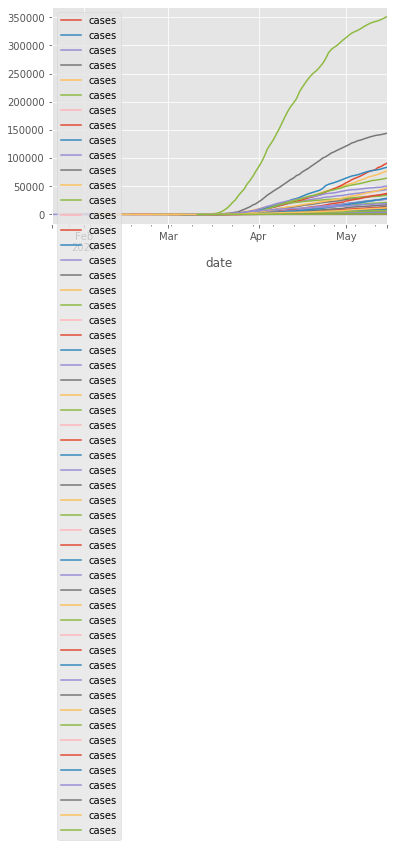

In [37]:
groupby_states = states_df.groupby('state')

with plt.style.context('ggplot'):
    fig, ax = plt.subplots()
    groupby_states.plot.line(x='date', y='cases', ax=ax)

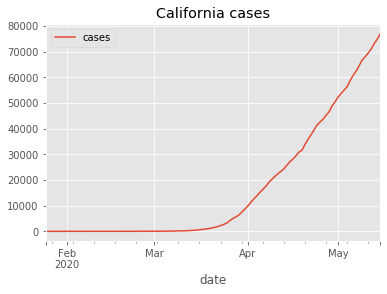

In [38]:
with plt.style.context('ggplot'):
    state_df = states_df[states_df.state == state]
    state_df.plot.line(x='date', y='cases')
    plt.title('{} cases'.format(state))

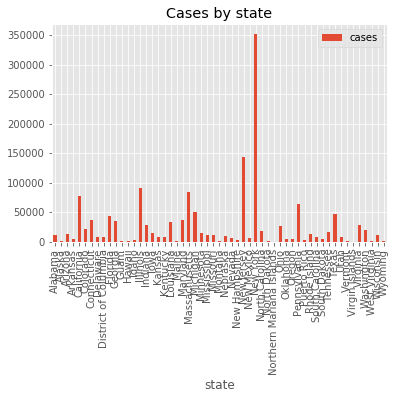

In [42]:
# Grab data from the most recent date.
recent_state_df = groupby_states.apply(lambda row: row.loc[row.date.idxmax()])

with plt.style.context('ggplot'):
    recent_state_df.plot.bar(y='cases')
    plt.title('Cases by state')

## Plot overlay on map

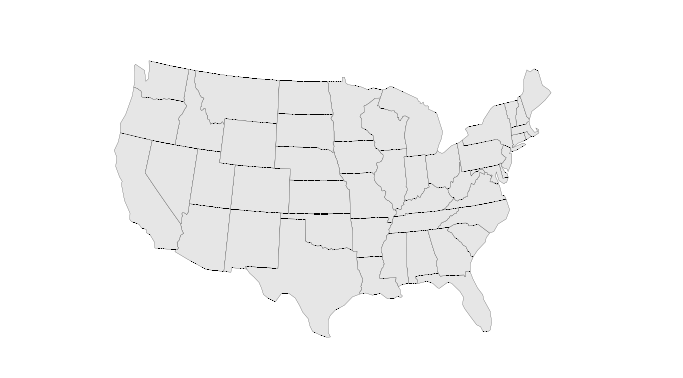

In [30]:
# Based on example: https://residentmario.github.io/geoplot/gallery/plot_usa_city_elevations.html
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

proj = gplt.crs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)
f, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': proj})
polyplot_kwargs = {'facecolor': (0.9, 0.9, 0.9), 'linewidth': 0.2}

gplt.polyplot(contiguous_usa.geometry, ax=ax, **polyplot_kwargs)